In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [2]:
df=pd.read_csv('all_games_df')
df

,Unnamed: 0,game_name,game_release_year,game_critics_amount,game_critics_score,game_user_score,game_genre_1,game_genre_2,game_genre_3,game_genre_4,game_genre_5,game_genre_6,game_genre_7,game_genre_8,game_genre_9,game_genre_10,game_genre_11,game_genre_12
0,0,Grand Theft Auto IV,2008,64.0,98.0,7.8,Action Adventure,Modern,Modern,Open-World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Grand Theft Auto IV,2008,86.0,98.0,7.9,Action Adventure,Modern,Modern,Open-World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Super Mario Galaxy,2007,73.0,97.0,9.1,Action,Platformer,Platformer,3D,3D,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Super Mario Galaxy 2,2010,87.0,97.0,9.1,Action,Platformer,Platformer,3D,3D,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Red Dead Redemption 2,2018,33.0,97.0,8.0,Action Adventure,Open-World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13979,63,Game Party,2007,8.0,25.0,3.9,Miscellaneous,Compilation,Party,Party,Party / Minigame,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13980,64,AMY,2012,35.0,25.0,3.8,Action Adventure,Horror,Horror,Survival,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13981,65,eFootball 2022,2021,7.0,25.0,1.4,Sports,Team,Soccer,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13982,66,Call for Heroes: Pompolic Wars,2007,7.0,25.0,3.0,Role-Playing,General,General,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,game_name,game_release_year,game_critics_amount,game_critics_score,game_user_score,game_genre_1,game_genre_2,game_genre_3,game_genre_4,game_genre_5,game_genre_6,game_genre_7,game_genre_8,game_genre_9,game_genre_10,game_genre_11,game_genre_12
0,Grand Theft Auto IV,2008,64.0,98.0,7.8,Action Adventure,Modern,Modern,Open-World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Grand Theft Auto IV,2008,86.0,98.0,7.9,Action Adventure,Modern,Modern,Open-World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Super Mario Galaxy,2007,73.0,97.0,9.1,Action,Platformer,Platformer,3D,3D,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Super Mario Galaxy 2,2010,87.0,97.0,9.1,Action,Platformer,Platformer,3D,3D,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Red Dead Redemption 2,2018,33.0,97.0,8.0,Action Adventure,Open-World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13979,Game Party,2007,8.0,25.0,3.9,Miscellaneous,Compilation,Party,Party,Party / Minigame,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13980,AMY,2012,35.0,25.0,3.8,Action Adventure,Horror,Horror,Survival,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13981,eFootball 2022,2021,7.0,25.0,1.4,Sports,Team,Soccer,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13982,Call for Heroes: Pompolic Wars,2007,7.0,25.0,3.0,Role-Playing,General,General,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
i=1
count=0
df.sort_values(by=['game_name'],inplace=True)
while i<len(df):
    if df.iloc[i]['game_name']==df.iloc[i-1]['game_name']:
        if (df.iloc[i]['game_critics_score']-df.iloc[i-1]['game_critics_score']>5) or (df.iloc[i]['game_user_score']-df.iloc[i-1]['game_user_score']>5):
            count+=1
        else:
            df.drop([df.iloc[[i]].index[0]],axis=0,inplace=True)
            i-=1
    i+=1
print(count)
df

506


,game_name,game_release_year,game_critics_amount,game_critics_score,game_user_score,game_genre_1,game_genre_2,game_genre_3,game_genre_4,game_genre_5,game_genre_6,game_genre_7,game_genre_8,game_genre_9,game_genre_10,game_genre_11,game_genre_12
8854,#DRIVE,2021,7.0,69.0,NaN,Racing,Arcade,Automobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4617,#IDARB,2015,31.0,77.0,6.9,Action,Miscellaneous,General,Party / Minigame,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12808,#KILLALLZOMBIES,2016,9.0,53.0,NaN,Action,Shooter,Shoot-'Em-Up,Top-Down,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1315,'Splosion Man,2009,52.0,84.0,7.8,Action,General,Platformer,Platformer,2D,2D,NaN,NaN,NaN,NaN,NaN,NaN
13439,.detuned,2009,9.0,46.0,3.7,Action,Miscellaneous,Rhythm,Music,Music,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7554,NaN,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8298,NaN,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10008,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10116,NaN,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe(include='all')

,game_name,game_release_year,game_critics_amount,game_critics_score,game_user_score,game_genre_1,game_genre_2,game_genre_3,game_genre_4,game_genre_5,game_genre_6,game_genre_7,game_genre_8,game_genre_9,game_genre_10,game_genre_11,game_genre_12
count,9411,9418.000000,9411.000000,9405.000000,8692.000000,9411,9410,7474,5144,3408,1723,814,210,63,19,4,1
unique,8905,NaN,NaN,NaN,NaN,58,101,140,151,138,99,62,32,17,10,3,1
top,Mount & Blade: Warband,NaN,NaN,NaN,NaN,Action,General,General,General,2D,Sci-Fi,Arcade,Arcade,Arcade,Arcade,Arcade,Historic
freq,3,NaN,NaN,NaN,NaN,3104,1615,1441,622,289,172,279,41,19,5,2,1
mean,NaN,2014.025271,22.709276,70.059968,6.847101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,4.412831,18.518448,11.850247,1.355354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2007.000000,0.000000,25.000000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2010.000000,10.000000,63.000000,6.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,16.000000,72.000000,7.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,29.000000,79.000000,7.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dropna(subset=['game_name'],inplace=True)
df.dropna(subset=['game_critics_score'],inplace=True)
df.dropna(subset=['game_user_score'],inplace=True)
df

,game_name,game_release_year,game_critics_amount,game_critics_score,game_user_score,game_genre_1,game_genre_2,game_genre_3,game_genre_4,game_genre_5,game_genre_6,game_genre_7,game_genre_8,game_genre_9,game_genre_10,game_genre_11,game_genre_12
4617,#IDARB,2015,31.0,77.0,6.9,Action,Miscellaneous,General,Party / Minigame,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1315,'Splosion Man,2009,52.0,84.0,7.8,Action,General,Platformer,Platformer,2D,2D,NaN,NaN,NaN,NaN,NaN,NaN
13439,.detuned,2009,9.0,46.0,3.7,Action,Miscellaneous,Rhythm,Music,Music,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5447,.hack//G.U. Last Recode,2017,21.0,76.0,8.1,Miscellaneous,Compilation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11389,.hack//G.U. vol. 2//Reminisce,2007,21.0,61.0,8.3,Role-Playing,Action RPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10704,nail'd,2010,49.0,64.0,7.1,Driving,Racing,Arcade,Arcade,Automobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8053,oOo: Ascension,2018,8.0,70.0,7.3,Action,General,Arcade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7241,rain,2013,77.0,72.0,7.8,Miscellaneous,Action Adventure,Fantasy,General,General,Fantasy,Linear,NaN,NaN,NaN,NaN,NaN
10429,theHunter: Call of the Wild,2017,13.0,64.0,7.0,Sports,Individual,Nature,Hunting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
def remove_genres_nan(df):
    for i in range(len(df)):
        for j in range(5,len(df.columns)):
            for t in range(j+1,len(df.columns)):
                if df.iloc[i][j]==df.iloc[i][t]:
                    df.iloc[i,t]=np.nan
    
    last_col_empty=True
    while last_col_empty:
        for i in range(len(df)-1,-1,-1):
            for j in range(len(df.columns)-1,5,-1):
                if pd.notnull(df.iloc[i][j]):
                    if pd.isnull(df.iloc[i][j-1]):
                        df.iloc[i,j-1]=df.iloc[i][j]
                        df.iloc[i,j]=np.nan
        if df[df.columns[len(df.columns)-1]].isnull().values.all():
            df.drop([df.columns[len(df.columns)-1]],axis=1,inplace=True)
        df_check=df[pd.notnull(df[df.columns[len(df.columns)-1]])].drop(['game_name','game_release_year','game_critics_amount','game_critics_score','game_user_score'],axis=1)
        if not df_check.isnull().values.any():
            last_col_empty=False


In [8]:
remove_genres_nan(df)
df

,game_name,game_release_year,game_critics_amount,game_critics_score,game_user_score,game_genre_1,game_genre_2,game_genre_3,game_genre_4,game_genre_5,game_genre_6,game_genre_7,game_genre_8,game_genre_9,game_genre_10
4617,#IDARB,2015,31.0,77.0,6.9,Action,Miscellaneous,General,Party / Minigame,NaN,NaN,NaN,NaN,NaN,NaN
1315,'Splosion Man,2009,52.0,84.0,7.8,Action,General,Platformer,2D,NaN,NaN,NaN,NaN,NaN,NaN
13439,.detuned,2009,9.0,46.0,3.7,Action,Miscellaneous,Rhythm,Music,NaN,NaN,NaN,NaN,NaN,NaN
5447,.hack//G.U. Last Recode,2017,21.0,76.0,8.1,Miscellaneous,Compilation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11389,.hack//G.U. vol. 2//Reminisce,2007,21.0,61.0,8.3,Role-Playing,Action RPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10704,nail'd,2010,49.0,64.0,7.1,Driving,Racing,Arcade,Automobile,NaN,NaN,NaN,NaN,NaN,NaN
8053,oOo: Ascension,2018,8.0,70.0,7.3,Action,General,Arcade,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7241,rain,2013,77.0,72.0,7.8,Miscellaneous,Action Adventure,Fantasy,General,Linear,NaN,NaN,NaN,NaN,NaN
10429,theHunter: Call of the Wild,2017,13.0,64.0,7.0,Sports,Individual,Nature,Hunting,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_genre=pd.DataFrame()
df_genre=df.drop(['game_name','game_release_year','game_critics_amount','game_critics_score','game_user_score'],axis=1)
df_genre

,game_genre_1,game_genre_2,game_genre_3,game_genre_4,game_genre_5,game_genre_6,game_genre_7,game_genre_8,game_genre_9,game_genre_10
4617,Action,Miscellaneous,General,Party / Minigame,NaN,NaN,NaN,NaN,NaN,NaN
1315,Action,General,Platformer,2D,NaN,NaN,NaN,NaN,NaN,NaN
13439,Action,Miscellaneous,Rhythm,Music,NaN,NaN,NaN,NaN,NaN,NaN
5447,Miscellaneous,Compilation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11389,Role-Playing,Action RPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10704,Driving,Racing,Arcade,Automobile,NaN,NaN,NaN,NaN,NaN,NaN
8053,Action,General,Arcade,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7241,Miscellaneous,Action Adventure,Fantasy,General,Linear,NaN,NaN,NaN,NaN,NaN
10429,Sports,Individual,Nature,Hunting,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
genre_list = set()
for col in df_genre.columns:
    for genre in df_genre[col].unique():
        genre_list.add(genre)
print(genre_list)  

{nan, 'Marine', 'Rugby', 'Roguelike', 'Logic', 'Tycoon', 'Scrolling', 'Trivia / Game Show', 'Soccer', 'Party', 'Nature', 'Open-World', 'Wakeboarding', 'Hidden Object', 'Large Spaceship', "Shoot-'Em-Up", 'Motorcycle', 'Real-Time', 'Top-Down', 'GT / Street', 'Board / Card Game', 'Biking', 'PC-style RPG', 'Cricket', 'Text', '4X', 'Driving', 'Role-Playing', 'Management', 'Alternative', 'Pet', 'Shooter', 'Videos', 'Music Maker', 'Billiards', 'Formula One', 'Skateboarding', 'Parlor', 'Kart', 'Hunting', 'Skating', 'Military', 'Breeding/Constructing', 'Basketball', 'Gambling', 'City Building', 'Ski / Snowboard', 'Massively Multiplayer Online', 'Traditional', '3D', 'Skiing', 'Card Battle', 'Civilian Plane', 'Interactive Movie', 'Space', 'Sci-Fi', 'Vertical', 'Board Games', 'Platformer', 'Sim', 'Adventure', 'Submarine', 'Vehicle', 'Rally / Offroad', 'Puzzle', 'Action Adventure', 'Stacking', 'Light Gun', 'Defense', 'Sports', 'Ice Hockey', 'Action RPG', 'Business / Tycoon', 'Edutainment', 'Futuris

In [11]:
del_genre_list=['3D','Application','Civilian Plane','Drag,General','Government','Hidden Object','Horizontal','Light Gun','Modern','On-foot','Other','Real-Time','Ship','Vertical','WWI','Modern Jet','2D','Alternative','Linear','Miscellaneous','Nature','Pet','Static','Stock Car','Street','Traditional','Videos','WWII','Marine','Civilian','Space','Management','Small Spaceship','Large Spaceship','Compilation','Stacking','Helicopter','Individual','Submarine','Command','Parlor','Futuristic Jet']
for i in range(len(df)):
    for j in range(5,len(df.columns)):
        if df.iloc[i][j] in del_genre_list:
            df.iloc[i,j]=np.nan               
df

,game_name,game_release_year,game_critics_amount,game_critics_score,game_user_score,game_genre_1,game_genre_2,game_genre_3,game_genre_4,game_genre_5,game_genre_6,game_genre_7,game_genre_8,game_genre_9,game_genre_10
4617,#IDARB,2015,31.0,77.0,6.9,Action,NaN,General,Party / Minigame,NaN,NaN,NaN,NaN,NaN,NaN
1315,'Splosion Man,2009,52.0,84.0,7.8,Action,General,Platformer,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13439,.detuned,2009,9.0,46.0,3.7,Action,NaN,Rhythm,Music,NaN,NaN,NaN,NaN,NaN,NaN
5447,.hack//G.U. Last Recode,2017,21.0,76.0,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11389,.hack//G.U. vol. 2//Reminisce,2007,21.0,61.0,8.3,Role-Playing,Action RPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10704,nail'd,2010,49.0,64.0,7.1,Driving,Racing,Arcade,Automobile,NaN,NaN,NaN,NaN,NaN,NaN
8053,oOo: Ascension,2018,8.0,70.0,7.3,Action,General,Arcade,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7241,rain,2013,77.0,72.0,7.8,NaN,Action Adventure,Fantasy,General,NaN,NaN,NaN,NaN,NaN,NaN
10429,theHunter: Call of the Wild,2017,13.0,64.0,7.0,Sports,NaN,NaN,Hunting,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
merge_genre_dict={'Athletics':'Sports','Baseball':'Sports','Basketball':'Sports','Biking':'Sports','Billiards':'Sports','Bowling':'Sports','Boxing,Boxing / Martial Arts':'Sports','Cricket':'Sports','Football':'Sports','Golf':'Sports','Horse Racing':'Sports','Ice Hockey':'Sports','Olympic Sports':'Sports','Rugby':'Sports','Skate / Skateboard':'Sports','Skateboarding':'Sports','Skating':'Sports','Ski / Snowboard':'Sports','Skiing':'Sports','Snow / Water':'Sports','Snowboarding':'Sports','Soccer':'Sports','Surf / Wakeboard':'Sports','Surfing':'Sports','Tennis':'Sports','Trainer':'Sports','Volleyball':'Sports','Wakeboarding':'Sports','Wrestling':'Sports','Exercise / Fitness':'Sports','Hunting':'Sports','Automobile':'Racing','GT / Street':'Racing','Kart':'Racing','Motocross':'Racing','Motorcycle':'Racing','Rally / Offroad':'Racing','Vehicle':'Racing','Demolition Derby':'Racing','Formula One':'Racing','4X':'Racing','Driving':'Racing','Truck':'Racing','Car Combat':'Racing','PC-style RPG':'RPG','Action RPG':'RPG','Role-Playing':'RPG','Console-style RPG':'RPG','Board Games':'Board / Card Game','Card Battle':'Board / Card Game','Tycoon':'Business / Tycoon','Massively Multiplayer':'Massively Multiplayer Online','Sim':'Simulation'}
for i in range(len(df)):
    for j in range(5,len(df.columns)):
        if df.iloc[i][j] in merge_genre_dict:
            df.iloc[i,j]=merge_genre_dict.get(df.iloc[i][j])
df

,game_name,game_release_year,game_critics_amount,game_critics_score,game_user_score,game_genre_1,game_genre_2,game_genre_3,game_genre_4,game_genre_5,game_genre_6,game_genre_7,game_genre_8,game_genre_9,game_genre_10
4617,#IDARB,2015,31.0,77.0,6.9,Action,NaN,General,Party / Minigame,NaN,NaN,NaN,NaN,NaN,NaN
1315,'Splosion Man,2009,52.0,84.0,7.8,Action,General,Platformer,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13439,.detuned,2009,9.0,46.0,3.7,Action,NaN,Rhythm,Music,NaN,NaN,NaN,NaN,NaN,NaN
5447,.hack//G.U. Last Recode,2017,21.0,76.0,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11389,.hack//G.U. vol. 2//Reminisce,2007,21.0,61.0,8.3,RPG,RPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10704,nail'd,2010,49.0,64.0,7.1,Racing,Racing,Arcade,Racing,NaN,NaN,NaN,NaN,NaN,NaN
8053,oOo: Ascension,2018,8.0,70.0,7.3,Action,General,Arcade,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7241,rain,2013,77.0,72.0,7.8,NaN,Action Adventure,Fantasy,General,NaN,NaN,NaN,NaN,NaN,NaN
10429,theHunter: Call of the Wild,2017,13.0,64.0,7.0,Sports,NaN,NaN,Sports,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
remove_genres_nan(df)
df

,game_name,game_release_year,game_critics_amount,game_critics_score,game_user_score,game_genre_1,game_genre_2,game_genre_3,game_genre_4,game_genre_5,game_genre_6,game_genre_7,game_genre_8,game_genre_9
4617,#IDARB,2015,31.0,77.0,6.9,Action,General,Party / Minigame,NaN,NaN,NaN,NaN,NaN,NaN
1315,'Splosion Man,2009,52.0,84.0,7.8,Action,General,Platformer,NaN,NaN,NaN,NaN,NaN,NaN
13439,.detuned,2009,9.0,46.0,3.7,Action,Rhythm,Music,NaN,NaN,NaN,NaN,NaN,NaN
5447,.hack//G.U. Last Recode,2017,21.0,76.0,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11389,.hack//G.U. vol. 2//Reminisce,2007,21.0,61.0,8.3,RPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10704,nail'd,2010,49.0,64.0,7.1,Racing,Arcade,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8053,oOo: Ascension,2018,8.0,70.0,7.3,Action,General,Arcade,NaN,NaN,NaN,NaN,NaN,NaN
7241,rain,2013,77.0,72.0,7.8,Action Adventure,Fantasy,General,NaN,NaN,NaN,NaN,NaN,NaN
10429,theHunter: Call of the Wild,2017,13.0,64.0,7.0,Sports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.dropna(subset=['game_genre_1'],inplace=True)
df

,game_name,game_release_year,game_critics_amount,game_critics_score,game_user_score,game_genre_1,game_genre_2,game_genre_3,game_genre_4,game_genre_5,game_genre_6,game_genre_7,game_genre_8,game_genre_9
4617,#IDARB,2015,31.0,77.0,6.9,Action,General,Party / Minigame,NaN,NaN,NaN,NaN,NaN,NaN
1315,'Splosion Man,2009,52.0,84.0,7.8,Action,General,Platformer,NaN,NaN,NaN,NaN,NaN,NaN
13439,.detuned,2009,9.0,46.0,3.7,Action,Rhythm,Music,NaN,NaN,NaN,NaN,NaN,NaN
11389,.hack//G.U. vol. 2//Reminisce,2007,21.0,61.0,8.3,RPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11560,.hack//G.U. vol. 3//Redemption,2007,15.0,60.0,8.6,RPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10704,nail'd,2010,49.0,64.0,7.1,Racing,Arcade,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8053,oOo: Ascension,2018,8.0,70.0,7.3,Action,General,Arcade,NaN,NaN,NaN,NaN,NaN,NaN
7241,rain,2013,77.0,72.0,7.8,Action Adventure,Fantasy,General,NaN,NaN,NaN,NaN,NaN,NaN
10429,theHunter: Call of the Wild,2017,13.0,64.0,7.0,Sports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_duplicated1 = df[df.duplicated(subset=['game_name'],keep=False)]
df_duplicated1

,game_name,game_release_year,game_critics_amount,game_critics_score,game_user_score,game_genre_1,game_genre_2,game_genre_3,game_genre_4,game_genre_5,game_genre_6,game_genre_7,game_genre_8,game_genre_9
8360,1979 Revolution: Black Friday,2018,10.0,70.0,5.9,Adventure,General,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4527,1979 Revolution: Black Friday,2018,7.0,77.0,7.1,Adventure,General,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8027,A Fisherman's Tale,2019,14.0,70.0,5.7,Adventure,General,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4224,A Fisherman's Tale,2019,8.0,78.0,5.0,Adventure,General,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2359,A Short Hike,2019,11.0,82.0,8.5,Adventure,General,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5689,Yooka-Laylee,2017,21.0,75.0,7.4,Action,Platformer,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6244,Ys: Memories of Celceta,2018,7.0,74.0,7.4,RPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967,Ys: Memories of Celceta,2013,56.0,82.0,8.7,RPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7521,de Blob,2018,14.0,72.0,7.3,Action,Platformer,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_duplicated2 = df[df.duplicated(subset=['game_name','game_release_year'],keep=False)]
df_duplicated2

,game_name,game_release_year,game_critics_amount,game_critics_score,game_user_score,game_genre_1,game_genre_2,game_genre_3,game_genre_4,game_genre_5,game_genre_6,game_genre_7,game_genre_8,game_genre_9
8360,1979 Revolution: Black Friday,2018,10.0,70.0,5.9,Adventure,General,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4527,1979 Revolution: Black Friday,2018,7.0,77.0,7.1,Adventure,General,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8027,A Fisherman's Tale,2019,14.0,70.0,5.7,Adventure,General,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4224,A Fisherman's Tale,2019,8.0,78.0,5.0,Adventure,General,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13096,AO International Tennis,2018,16.0,50.0,6.0,Sports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13397,X-Men: Destiny,2011,51.0,47.0,4.9,Action,Beat-'Em-Up,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13954,XIII (Remake),2020,9.0,29.0,2.8,Action,Shooter,First-Person,Arcade,NaN,NaN,NaN,NaN,NaN
13770,XIII (Remake),2020,11.0,39.0,3.5,Action,Shooter,First-Person,Arcade,NaN,NaN,NaN,NaN,NaN
9089,Yooka-Laylee,2017,53.0,68.0,6.2,Action,Platformer,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_duplicated3=df_duplicated1.drop(df_duplicated2.index.tolist())
df_duplicated3.sort_values(by=['game_name','game_release_year'])

,game_name,game_release_year,game_critics_amount,game_critics_score,game_user_score,game_genre_1,game_genre_2,game_genre_3,game_genre_4,game_genre_5,game_genre_6,game_genre_7,game_genre_8,game_genre_9
2359,A Short Hike,2019,11.0,82.0,8.5,Adventure,General,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,A Short Hike,2020,17.0,88.0,8.6,Adventure,General,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8871,ARK: Survival Evolved,2017,15.0,69.0,5.2,Action Adventure,Survival,Sandbox,NaN,NaN,NaN,NaN,NaN,NaN
13953,ARK: Survival Evolved,2018,12.0,29.0,2.5,Action Adventure,Survival,Sandbox,NaN,NaN,NaN,NaN,NaN,NaN
529,Art of Balance,2010,10.0,88.0,7.9,Puzzle,General,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4073,Yonder: The Cloud Catcher Chronicles,2019,8.0,78.0,7.3,Action Adventure,Open-World,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967,Ys: Memories of Celceta,2013,56.0,82.0,8.7,RPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6244,Ys: Memories of Celceta,2018,7.0,74.0,7.4,RPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2369,de Blob,2008,48.0,82.0,8.2,Action,Platformer,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
list_game_name=df_duplicated3['game_name'].unique()
for name in list_game_name:
    same_game=df_duplicated3[df_duplicated3['game_name']==name]
    year=same_game['game_release_year'].min()
    df_duplicated3.loc[df_duplicated3['game_name']==name,'game_release_year']=year
df_duplicated3

,game_name,game_release_year,game_critics_amount,game_critics_score,game_user_score,game_genre_1,game_genre_2,game_genre_3,game_genre_4,game_genre_5,game_genre_6,game_genre_7,game_genre_8,game_genre_9
2359,A Short Hike,2019,11.0,82.0,8.5,Adventure,General,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,A Short Hike,2019,17.0,88.0,8.6,Adventure,General,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13953,ARK: Survival Evolved,2017,12.0,29.0,2.5,Action Adventure,Survival,Sandbox,NaN,NaN,NaN,NaN,NaN,NaN
8871,ARK: Survival Evolved,2017,15.0,69.0,5.2,Action Adventure,Survival,Sandbox,NaN,NaN,NaN,NaN,NaN,NaN
2245,Art of Balance,2010,9.0,82.0,8.0,Puzzle,General,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4073,Yonder: The Cloud Catcher Chronicles,2017,8.0,78.0,7.3,Action Adventure,Open-World,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6244,Ys: Memories of Celceta,2013,7.0,74.0,7.4,RPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967,Ys: Memories of Celceta,2013,56.0,82.0,8.7,RPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7521,de Blob,2008,14.0,72.0,7.3,Action,Platformer,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
list_games_name=df['game_name'].unique()
list_game_name_dup=df_duplicated3['game_name'].unique()
for name in list_games_name:
    if name in list_game_name_dup: 
        df.loc[df['game_name']==name,'game_release_year']=df_duplicated3[df_duplicated3['game_name']==name]['game_release_year'].min()
df

,game_name,game_release_year,game_critics_amount,game_critics_score,game_user_score,game_genre_1,game_genre_2,game_genre_3,game_genre_4,game_genre_5,game_genre_6,game_genre_7,game_genre_8,game_genre_9
4617,#IDARB,2015,31.0,77.0,6.9,Action,General,Party / Minigame,NaN,NaN,NaN,NaN,NaN,NaN
1315,'Splosion Man,2009,52.0,84.0,7.8,Action,General,Platformer,NaN,NaN,NaN,NaN,NaN,NaN
13439,.detuned,2009,9.0,46.0,3.7,Action,Rhythm,Music,NaN,NaN,NaN,NaN,NaN,NaN
11389,.hack//G.U. vol. 2//Reminisce,2007,21.0,61.0,8.3,RPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11560,.hack//G.U. vol. 3//Redemption,2007,15.0,60.0,8.6,RPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10704,nail'd,2010,49.0,64.0,7.1,Racing,Arcade,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8053,oOo: Ascension,2018,8.0,70.0,7.3,Action,General,Arcade,NaN,NaN,NaN,NaN,NaN,NaN
7241,rain,2013,77.0,72.0,7.8,Action Adventure,Fantasy,General,NaN,NaN,NaN,NaN,NaN,NaN
10429,theHunter: Call of the Wild,2017,13.0,64.0,7.0,Sports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_duplicated = df[df.duplicated(subset=['game_name'],keep=False)]
list_games_name=df['game_name'].unique()
list_game_name_dup=df_duplicated['game_name'].unique()
for name in list_games_name:
    if name in list_game_name_dup:
        df.loc[df['game_name']==name,'game_critics_score']=df_duplicated[df_duplicated['game_name']==name]['game_critics_score'].mean()
        df.loc[df['game_name']==name,'game_user_score']=df_duplicated[df_duplicated['game_name']==name]['game_user_score'].mean()
        df.loc[df['game_name']==name,'game_critics_amount']=df_duplicated[df_duplicated['game_name']==name]['game_critics_amount'].mean()
df

,game_name,game_release_year,game_critics_amount,game_critics_score,game_user_score,game_genre_1,game_genre_2,game_genre_3,game_genre_4,game_genre_5,game_genre_6,game_genre_7,game_genre_8,game_genre_9
4617,#IDARB,2015,31.0,77.0,6.9,Action,General,Party / Minigame,NaN,NaN,NaN,NaN,NaN,NaN
1315,'Splosion Man,2009,52.0,84.0,7.8,Action,General,Platformer,NaN,NaN,NaN,NaN,NaN,NaN
13439,.detuned,2009,9.0,46.0,3.7,Action,Rhythm,Music,NaN,NaN,NaN,NaN,NaN,NaN
11389,.hack//G.U. vol. 2//Reminisce,2007,21.0,61.0,8.3,RPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11560,.hack//G.U. vol. 3//Redemption,2007,15.0,60.0,8.6,RPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10704,nail'd,2010,49.0,64.0,7.1,Racing,Arcade,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8053,oOo: Ascension,2018,8.0,70.0,7.3,Action,General,Arcade,NaN,NaN,NaN,NaN,NaN,NaN
7241,rain,2013,77.0,72.0,7.8,Action Adventure,Fantasy,General,NaN,NaN,NaN,NaN,NaN,NaN
10429,theHunter: Call of the Wild,2017,13.0,64.0,7.0,Sports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.drop_duplicates(subset=['game_name'],inplace=True)
df_duplicated = df[df.duplicated(subset=['game_name'],keep=False)]
df_duplicated

,game_name,game_release_year,game_critics_amount,game_critics_score,game_user_score,game_genre_1,game_genre_2,game_genre_3,game_genre_4,game_genre_5,game_genre_6,game_genre_7,game_genre_8,game_genre_9


In [22]:
for i in range(len(df)):
    df.iloc[i,4]=df.iloc[i][4]*10
df

,game_name,game_release_year,game_critics_amount,game_critics_score,game_user_score,game_genre_1,game_genre_2,game_genre_3,game_genre_4,game_genre_5,game_genre_6,game_genre_7,game_genre_8,game_genre_9
4617,#IDARB,2015,31.0,77.0,69.0,Action,General,Party / Minigame,NaN,NaN,NaN,NaN,NaN,NaN
1315,'Splosion Man,2009,52.0,84.0,78.0,Action,General,Platformer,NaN,NaN,NaN,NaN,NaN,NaN
13439,.detuned,2009,9.0,46.0,37.0,Action,Rhythm,Music,NaN,NaN,NaN,NaN,NaN,NaN
11389,.hack//G.U. vol. 2//Reminisce,2007,21.0,61.0,83.0,RPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11560,.hack//G.U. vol. 3//Redemption,2007,15.0,60.0,86.0,RPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10704,nail'd,2010,49.0,64.0,71.0,Racing,Arcade,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8053,oOo: Ascension,2018,8.0,70.0,73.0,Action,General,Arcade,NaN,NaN,NaN,NaN,NaN,NaN
7241,rain,2013,77.0,72.0,78.0,Action Adventure,Fantasy,General,NaN,NaN,NaN,NaN,NaN,NaN
10429,theHunter: Call of the Wild,2017,13.0,64.0,70.0,Sports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


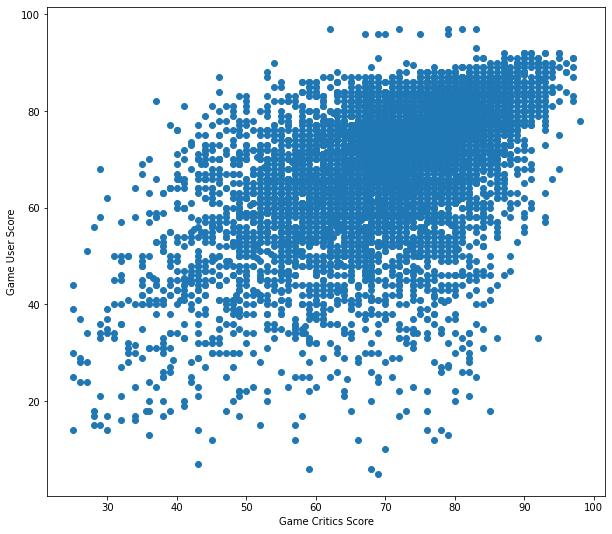

In [23]:
fig = plt.figure(figsize=(10,9))
ax = plt.axes()
ax.scatter(df.game_critics_score, df.game_user_score)
plt.xlabel('Game Critics Score')
plt.ylabel('Game User Score')
plt.show()

In [24]:
list_of_genres=[]
for i in range(len(df)):
    for j in range(5,len(df.columns)-1):
        if pd.notnull(df.iloc[i][j]):
            list_of_genres.append((df.iloc[i][3],df.iloc[i][j]))
df_genre_grade = pd.DataFrame(list_of_genres, columns =['game_critics_score', 'game_genre'])
df_genre_grade


,game_critics_score,game_genre
0,77.0,Action
1,77.0,General
2,77.0,Party / Minigame
3,84.0,Action
4,84.0,General
...,...,...
21845,72.0,Fantasy
21846,72.0,General
21847,64.0,Sports
21848,74.0,RPG


In [25]:
df_genre_grade[df_genre_grade['game_genre']=='Artillery']

,game_critics_score,game_genre
21317,75.0,Artillery
21322,84.0,Artillery
21326,70.0,Artillery
21330,73.0,Artillery
21336,79.0,Artillery
21340,73.0,Artillery
21350,59.0,Artillery
21353,79.5,Artillery
21357,64.0,Artillery
21361,65.0,Artillery


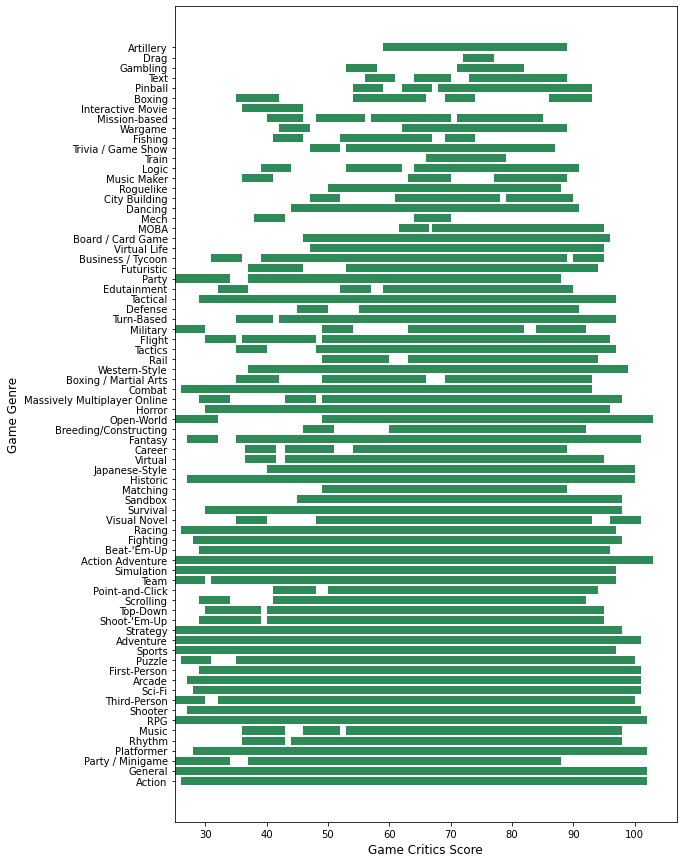

In [27]:
fig1 = plt.figure(figsize=(9,15))
plt.barh(y=df_genre_grade['game_genre'],left =df_genre_grade['game_critics_score'],width=5,height=0.8,color='seagreen',linewidth=5)
plt.xlabel("Game Critics Score",fontsize=12)
plt.ylabel("Game Genre",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Text(0, 0.5, 'game critics score')

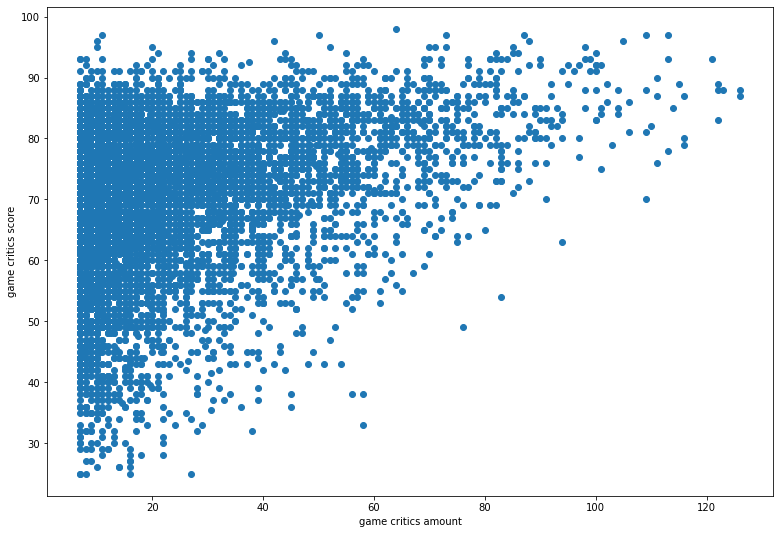

In [28]:
fig = plt.figure(figsize=(13,9))
ax = plt.axes()
ax.scatter(df.game_critics_amount, df.game_critics_score)
plt.xlabel('game critics amount')
plt.ylabel('game critics score')


In [35]:
list_of_grade_categories=[(0,25),(25,55),(55,65),(65,70),(70,75),(75,80),(80,90),(90,100)]
grade_categorized=[]
for i in range(len(df_genre_grade)):
    for cat in list_of_grade_categories:
        if cat[0]<df_genre_grade.iloc[i][0]<=cat[1]:
            grade_categorized.append(str(cat[0])+'-'+str(cat[1]))
            break
df_genre_grade['grade_categorized']=grade_categorized
df_genre_grade

,game_critics_score,game_genre,grade_categorized
0,77.0,Action,75-80
1,77.0,General,75-80
2,77.0,Party / Minigame,75-80
3,84.0,Action,80-90
4,84.0,General,80-90
...,...,...,...
21845,72.0,Fantasy,70-75
21846,72.0,General,70-75
21847,64.0,Sports,55-65
21848,74.0,RPG,70-75


In [36]:
ct1=pd.crosstab(df_genre_grade['game_genre'],df_genre_grade['grade_categorized'])
ct1

grade_categorized,0-25,25-55,55-65,65-70,70-75,75-80,80-90,90-100
game_genre,,,,,,,,
Action,0,401,511,429,544,587,514,42
Action Adventure,1,147,197,176,245,210,225,32
Adventure,1,84,152,155,200,203,154,5
Arcade,0,137,177,133,169,141,147,14
Artillery,0,0,3,1,3,3,1,0
...,...,...,...,...,...,...,...,...
Virtual,0,12,25,28,32,19,16,0
Virtual Life,0,7,8,16,26,10,12,0
Visual Novel,0,6,11,12,16,22,24,1


In [37]:
df_genre_grade_num = df_genre_grade.copy()
df_genre_grade_num['game_genre']=df_genre_grade_num['game_genre'].astype("category").cat.codes
df_genre_grade_num['grade_categorized']=df_genre_grade_num['grade_categorized'].astype("category").cat.codes
df_genre_grade_num['game_critics_score']=df_genre_grade_num['game_critics_score'].astype("category").cat.codes
df_genre_grade_num

,game_critics_score,game_genre,grade_categorized
0,90,0,5
1,90,25,5
2,90,41,5
3,104,0,6
4,104,25,6
...,...,...,...
21845,80,18,4
21846,80,25,4
21847,63,57,2
21848,84,46,4


In [38]:
XTrain, XTest, yTrain, yTest = train_test_split(df_genre_grade_num.iloc[:,0:2], df_genre_grade_num.iloc[:,2:], random_state=1, test_size=0.2)
parameters = {'max_depth':range(1,5),"min_samples_split":range(2,6) }
dt = tree.DecisionTreeClassifier()

clf = GridSearchCV(dt, parameters,scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
clf.fit(XTrain, yTrain)
print("best parameter set is:",clf.best_params_," and its score was",clf.best_score_)

best parameter set is: {'max_depth': 4, 'min_samples_split': 2}  and its score was 0.8820366132723112


In [39]:
decisionTree = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=2)
decisionTree = decisionTree.fit(XTrain, yTrain)
y_pred_train = decisionTree.predict(XTrain)
print('Accuracy on training data = ', 
      metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))
y_pred = decisionTree.predict(XTest)
print('Accuracy on test data = ', 
      metrics.accuracy_score(y_true = yTest, y_pred = y_pred))


Accuracy on training data =  0.8820366132723112
Accuracy on test data =  0.8803203661327231


In [40]:
forest =  RandomForestClassifier()
trained_forest = forest.fit(XTrain, yTrain.values.ravel()) 
par={'n_estimators':range(2,10)}
cl=GridSearchCV(forest,par,scoring=make_scorer(metrics.accuracy_score,greater_is_better=True))
cl.fit(XTrain, yTrain.values.ravel())
y_pred_train=cl.predict(XTrain)
print('Accuracy on training data = ', 
      metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))
y_pred=cl.predict(XTest)
print('Accuracy on test data = ', 
      metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

Accuracy on training data =  0.9999427917620137
Accuracy on test data =  0.9997711670480549


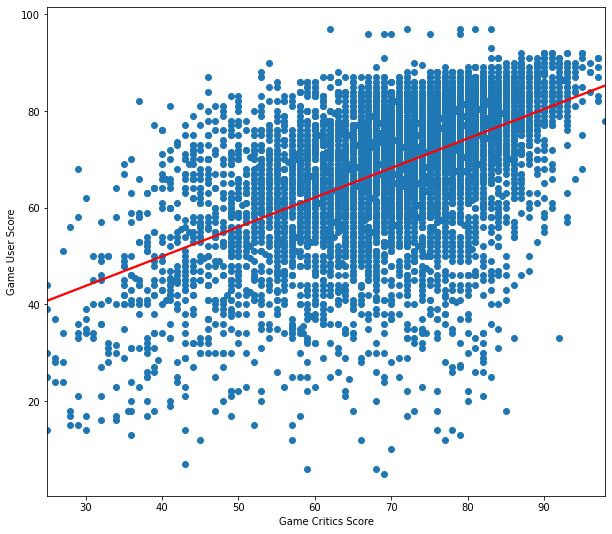

In [29]:
m=linear_model.LinearRegression().fit(df.iloc[:,3:4],df.iloc[:,4:5])

fig = plt.figure(figsize=(10,9.))
ax = plt.axes()
ax.scatter(df.game_critics_score, df.game_user_score)
sns.regplot(x=df['game_critics_score'],y=m.predict(df.iloc[:,3:4]),color='r',scatter=False)
plt.xlabel('Game Critics Score')
plt.ylabel('Game User Score')
plt.show()

In [30]:
sse = sum([(y - y_hat)**2 for y,y_hat in zip(df.game_critics_score.tolist(),m.predict(df.iloc[:,3:4]).flatten())])
print(sse)
mean_squared_error(df.game_critics_score.tolist(),m.predict(df.iloc[:,3:4]).flatten())*len(df.game_critics_score.tolist())

206222.46952751736


206222.46952751954

In [31]:
r2_score(df.game_critics_score.tolist(),m.predict(df.iloc[:,3:4]))

0.8188059608958849

In [32]:
list_score_diff=[]
for i in range(len(df)):
    if df.iloc[i][3]>df.iloc[i][4]:
        list_score_diff.append(df.iloc[i][3]-df.iloc[i][4])
    else:
        list_score_diff.append(df.iloc[i][4]-df.iloc[i][3])
df['score_diff']=list_score_diff
df

,game_name,game_release_year,game_critics_amount,game_critics_score,game_user_score,game_genre_1,game_genre_2,game_genre_3,game_genre_4,game_genre_5,game_genre_6,game_genre_7,game_genre_8,game_genre_9,score_diff
4617,#IDARB,2015,31.0,77.0,69.0,Action,General,Party / Minigame,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1315,'Splosion Man,2009,52.0,84.0,78.0,Action,General,Platformer,NaN,NaN,NaN,NaN,NaN,NaN,6.0
13439,.detuned,2009,9.0,46.0,37.0,Action,Rhythm,Music,NaN,NaN,NaN,NaN,NaN,NaN,9.0
11389,.hack//G.U. vol. 2//Reminisce,2007,21.0,61.0,83.0,RPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0
11560,.hack//G.U. vol. 3//Redemption,2007,15.0,60.0,86.0,RPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10704,nail'd,2010,49.0,64.0,71.0,Racing,Arcade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
8053,oOo: Ascension,2018,8.0,70.0,73.0,Action,General,Arcade,NaN,NaN,NaN,NaN,NaN,NaN,3.0
7241,rain,2013,77.0,72.0,78.0,Action Adventure,Fantasy,General,NaN,NaN,NaN,NaN,NaN,NaN,6.0
10429,theHunter: Call of the Wild,2017,13.0,64.0,70.0,Sports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0


In [33]:
Q1=np.percentile(df['score_diff'],25)
Q3=np.percentile(df['score_diff'],75)
IQR=Q3-Q1
score_diff_outlires_rows=df[(df['score_diff']<Q1-1.5*IQR)|(df['score_diff']>Q3+1.5*IQR)].index
print(score_diff_outlires_rows)
df.drop(score_diff_outlires_rows.tolist(),inplace=True)

Int64Index([11560,  2160,  6789,  5036, 13697, 10854,  4923, 11791,  8778,
             4506,
            ...
            11299,  4749, 10465, 13221,  1708, 13412,  9399,  6241,  9010,
             6236],
           dtype='int64', length=437)


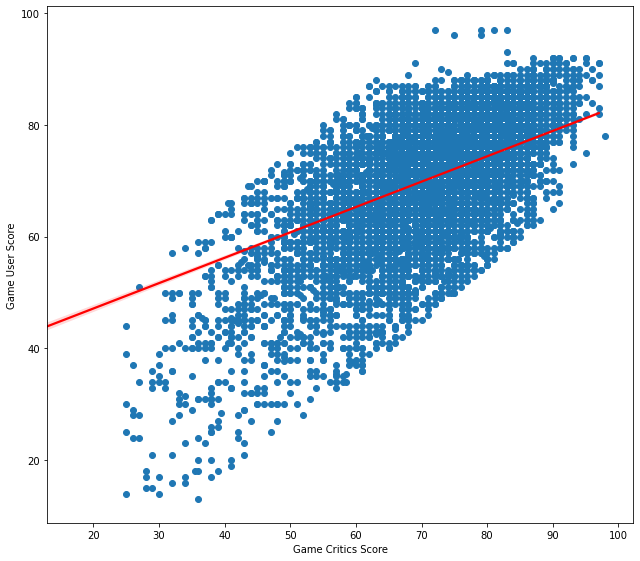

0.8987193219204054

In [34]:
m=linear_model.LinearRegression().fit(df.iloc[:,3:4],df.iloc[:,4:5])
fig = plt.figure(figsize=(10.5,9.5))
ax = plt.axes()
ax.scatter(df.game_critics_score, df.game_user_score)
sns.regplot(x=df['game_user_score'],y=m.predict(df.iloc[:,3:4]),color='r',scatter=False)
plt.xlabel('Game Critics Score')
plt.ylabel('Game User Score')
plt.show()

r2_score(df.game_critics_score.tolist(),m.predict(df.iloc[:,3:4]).flatten())

In [41]:
list_score_amount_ratio=[]
for i in range(len(df)):
    list_score_amount_ratio.append(df.iloc[i][2]/df.iloc[i][3])
df['critics_score_to_amount_ratio']=list_score_amount_ratio
df

,game_name,game_release_year,game_critics_amount,game_critics_score,game_user_score,game_genre_1,game_genre_2,game_genre_3,game_genre_4,game_genre_5,game_genre_6,game_genre_7,game_genre_8,game_genre_9,score_diff,critics_score_to_amount_ratio
4617,#IDARB,2015,31.0,77.0,69.0,Action,General,Party / Minigame,NaN,NaN,NaN,NaN,NaN,NaN,8.0,0.402597
1315,'Splosion Man,2009,52.0,84.0,78.0,Action,General,Platformer,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.619048
13439,.detuned,2009,9.0,46.0,37.0,Action,Rhythm,Music,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0.195652
11389,.hack//G.U. vol. 2//Reminisce,2007,21.0,61.0,83.0,RPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,0.344262
13714,0 Day Attack on Earth,2009,19.0,41.0,45.0,Action,Shooter,Third-Person,Sci-Fi,Arcade,NaN,NaN,NaN,NaN,4.0,0.463415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10704,nail'd,2010,49.0,64.0,71.0,Racing,Arcade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0.765625
8053,oOo: Ascension,2018,8.0,70.0,73.0,Action,General,Arcade,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.114286
7241,rain,2013,77.0,72.0,78.0,Action Adventure,Fantasy,General,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1.069444
10429,theHunter: Call of the Wild,2017,13.0,64.0,70.0,Sports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.203125


In [42]:
Q1=np.percentile(df['critics_score_to_amount_ratio'],25)
Q3=np.percentile(df['critics_score_to_amount_ratio'],75)
IQR=Q3-Q1
score_diff_outlires_rows=df[(df['critics_score_to_amount_ratio']<Q1-1.5*IQR)|(df['critics_score_to_amount_ratio']>Q3+1.5*IQR)].index
print(score_diff_outlires_rows)
df_copy=df.drop(score_diff_outlires_rows.tolist())

Int64Index([13497, 10180, 12125,  4638,  2680,  1885, 10454, 13302,  9791,
              206,
            ...
             5187,  3460, 10405,  3969,  4829,  1245,  1798,  6932,  3271,
             7241],
           dtype='int64', length=331)


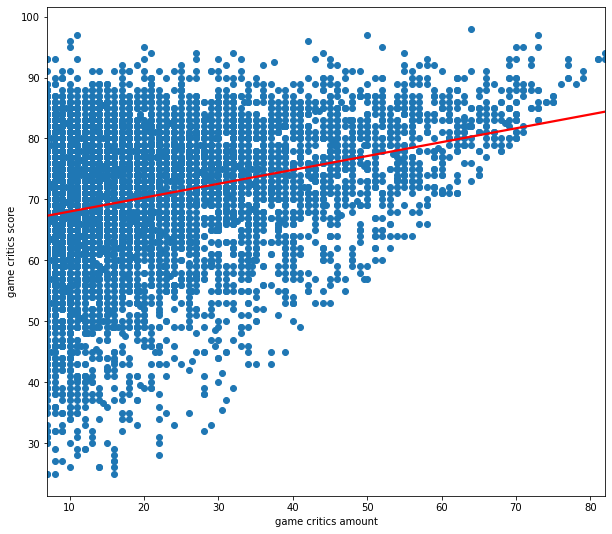

In [43]:
XTrain, XTest, yTrain, yTest = train_test_split(df_copy.iloc[:,2:3], df_copy.iloc[:,3:4], random_state=1, test_size=0.2)


m=linear_model.LinearRegression().fit(XTrain,yTrain)
fig = plt.figure(figsize=(10,9))
ax = plt.axes()
ax.scatter(df_copy.game_critics_amount, df_copy.game_critics_score)
sns.regplot(x=XTest,y=m.predict(XTest),color='r',scatter=False)
plt.xlabel('game critics amount')
plt.ylabel('game critics score')
plt.show()


In [44]:
sse = sum([(y - y_hat)**2 for y,y_hat in zip(XTest.game_critics_amount.tolist(),m.predict(XTest).flatten())])

y_hat=XTest.mean()
ssr= sum([(y-y_hat)**2 for y in m.predict(XTest).flatten()])

tss=ssr+sse

r2=1-sse/tss
r2

game_critics_amount    0.488116
dtype: float64